In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam







data1 = pd.read_csv("/content/drive/MyDrive/CSE422 project/preprocessed_dataset.csv")

# Step 1: Split the data
# Assuming the target column is named 'diabetes' (replace with the actual target column name)
X = data1.drop(columns=['diabetes'])  # Features
y = data1['diabetes']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print('Test precison = ', precision_score(y_test, y_pred_log_reg))
print('Test recall = ', recall_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 4: Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print('Test precison = ', precision_score(y_test, y_pred_log_reg))
print('Test recall = ', recall_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_dtree))

# Step 5: Train K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nK-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print('Test precison = ', precision_score(y_test, y_pred_log_reg))
print('Test recall = ', recall_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_knn))

Logistic Regression Results:
Accuracy: 0.9604616156547918
Test precison =  0.871319520174482
Test recall =  0.6281446540880503
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27351
         1.0       0.87      0.63      0.73      2544

    accuracy                           0.96     29895
   macro avg       0.92      0.81      0.85     29895
weighted avg       0.96      0.96      0.96     29895


Decision Tree Results:
Accuracy: 0.9499247365780231
Test precison =  0.871319520174482
Test recall =  0.6281446540880503
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     27351
         1.0       0.70      0.73      0.71      2544

    accuracy                           0.95     29895
   macro avg       0.84      0.85      0.84     29895
weighted avg       0.95      0.95      0.95     29895


K-Nearest Neighbors Results:
Accuracy: 0.9546412443552433
Test precison =  0.871319520174482
Tes

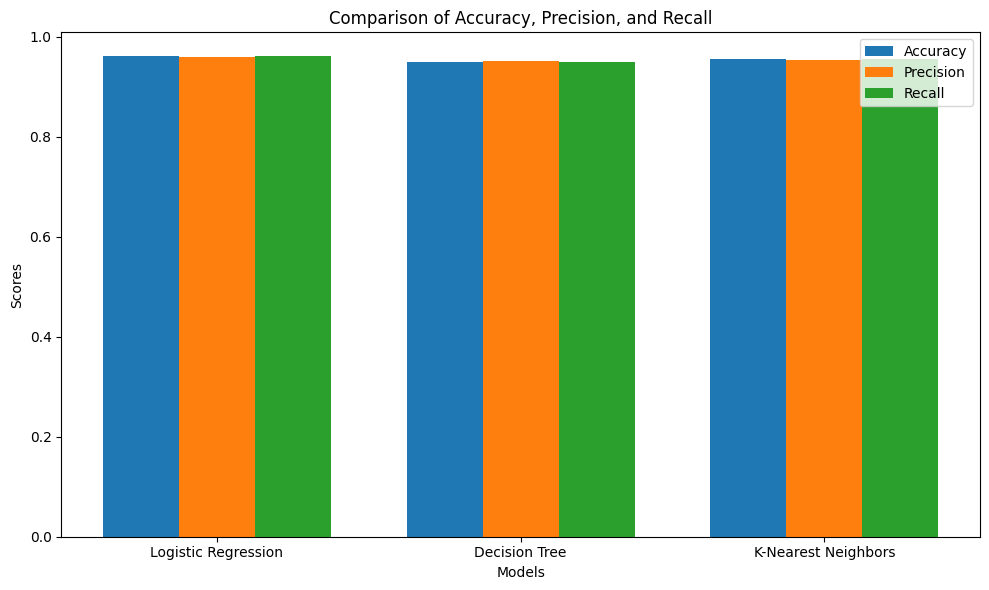

In [13]:
# Calculate accuracy, precision, and recall for each model
models = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors"]
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test_scaled)),
    accuracy_score(y_test, dtree.predict(X_test)),
    accuracy_score(y_test, knn.predict(X_test_scaled)),
]
precisions = [
    precision_score(y_test, log_reg.predict(X_test_scaled), average='weighted'),
    precision_score(y_test, dtree.predict(X_test), average='weighted'),
    precision_score(y_test, knn.predict(X_test_scaled), average='weighted'),
]
recalls = [
    recall_score(y_test, log_reg.predict(X_test_scaled), average='weighted'),
    recall_score(y_test, dtree.predict(X_test), average='weighted'),
    recall_score(y_test, knn.predict(X_test_scaled), average='weighted'),
]

# Bar chart
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracies, width, label='Accuracy')
ax.bar(x, precisions, width, label='Precision')
ax.bar(x + width, recalls, width, label='Recall')

# Labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


Logistic Regression Results:
Accuracy: 0.9605
Precision: 0.9582
Recall: 0.9605
F1-Score: 0.9575

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27351
         1.0       0.87      0.63      0.73      2544

    accuracy                           0.96     29895
   macro avg       0.92      0.81      0.85     29895
weighted avg       0.96      0.96      0.96     29895



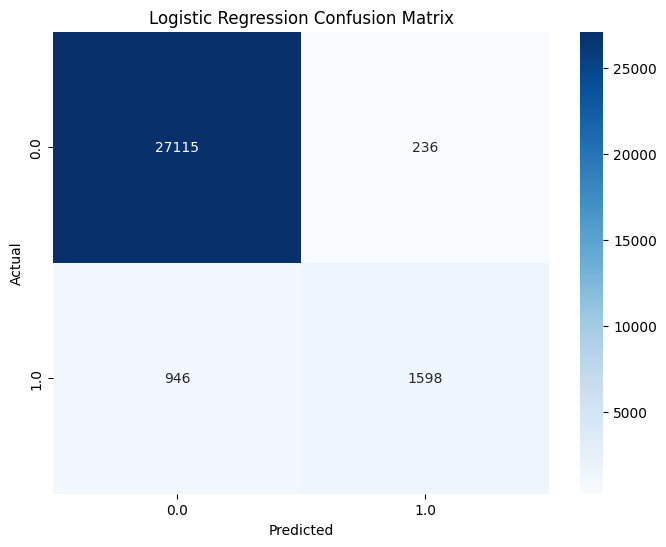


Decision Tree Results:
Accuracy: 0.9499
Precision: 0.9510
Recall: 0.9499
F1-Score: 0.9504

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     27351
         1.0       0.70      0.73      0.71      2544

    accuracy                           0.95     29895
   macro avg       0.84      0.85      0.84     29895
weighted avg       0.95      0.95      0.95     29895



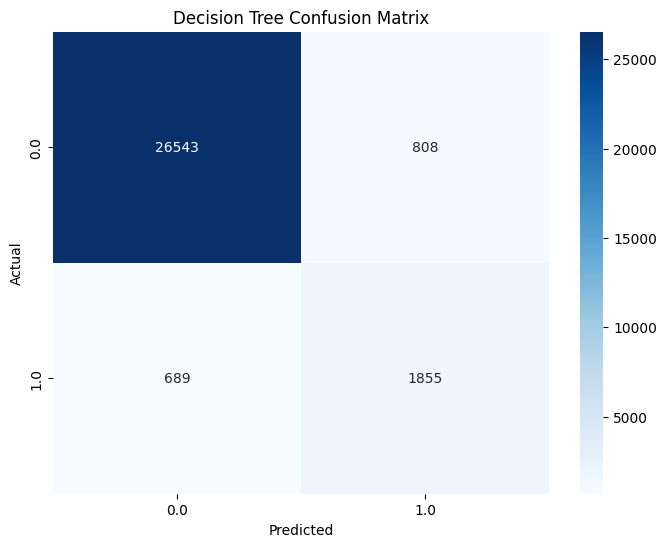


K-Nearest Neighbors Results:
Accuracy: 0.9546
Precision: 0.9522
Recall: 0.9546
F1-Score: 0.9495

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     27351
         1.0       0.89      0.54      0.67      2544

    accuracy                           0.95     29895
   macro avg       0.92      0.77      0.82     29895
weighted avg       0.95      0.95      0.95     29895



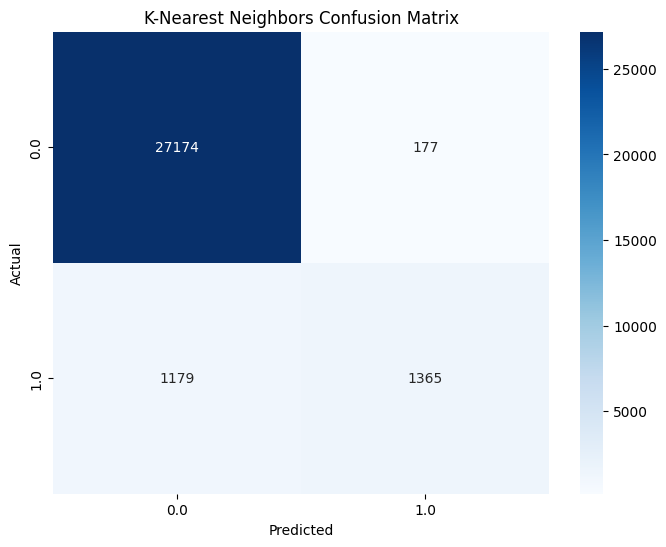

In [8]:


# Function to test and evaluate a model
def test_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Test Logistic Regression
test_model(log_reg, X_test_scaled, y_test, "Logistic Regression")

# Test Decision Tree
test_model(dtree, X_test, y_test, "Decision Tree")

# Test K-Nearest Neighbors
test_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")

In [9]:


# Load the preprocessed dataset
data = pd.read_csv("/content/drive/MyDrive/CSE422 project/preprocessed_dataset.csv")

# Separate features and target
X = data.drop(columns=['diabetes'])  # Replace 'diabetes' with the target column name
y = data['diabetes']  # Target column

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Save the trained model
model.save("/content/drive/MyDrive/CSE422 project/diabetes_neural_network.h5")

# Predict on new data (example)
sample_input = [[2023, 1, 45, 3, 0, 0, 1, 0, 0, 1, 0, 2, 24.5, 6.2, 130]]  # Replace with real data
sample_input_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_input_scaled)
print(f"Prediction (Probability of Diabetes): {prediction[0][0]:.4f}")
print(f"Prediction: {'Diabetes' if prediction[0][0] >= 0.5 else 'No Diabetes'}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2180/2180 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9334 - loss: 0.1728 - val_accuracy: 0.9622 - val_loss: 0.1082
Epoch 2/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9620 - loss: 0.1086 - val_accuracy: 0.9684 - val_loss: 0.0962
Epoch 3/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9690 - loss: 0.0932 - val_accuracy: 0.9690 - val_loss: 0.0915
Epoch 4/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9697 - loss: 0.0893 - val_accuracy: 0.9689 - val_loss: 0.0896
Epoch 5/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9703 - loss: 0.0865 - val_accuracy: 0.9695 - val_loss: 0.0872
Epoch 6/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9703 - loss: 0.0857 - val_accuracy: 0.9710 - val_loss: 0.0869
Epoch 7/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9700 - loss: 0.0861 - val_accuracy: 0.9708 - val_loss: 0.0854
Epoch 8/20
2180/2180 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9720 - loss: 0.0805 - val_accurac

Test Loss: 0.0867
Test Accuracy: 0.9705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction (Probability of Diabetes): 0.0000
Prediction: No Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction (Probability of Diabetes): 0.0000
Prediction: No Diabetes


935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9705
Precision: 0.9487
Recall: 0.6910
F1-Score: 0.7996

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     27351
         1.0       0.95      0.69      0.80      2544

    accuracy                           0.97     29895
   macro avg       0.96      0.84      0.89     29895
weighted avg       0.97      0.97      0.97     29895



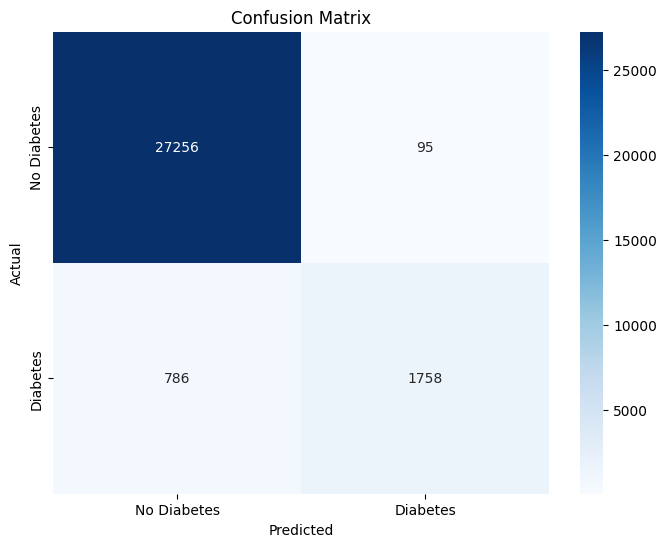

In [15]:


# Predict on the test set
y_pred_prob = model.predict(X_test_scaled)  # Get probabilities
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


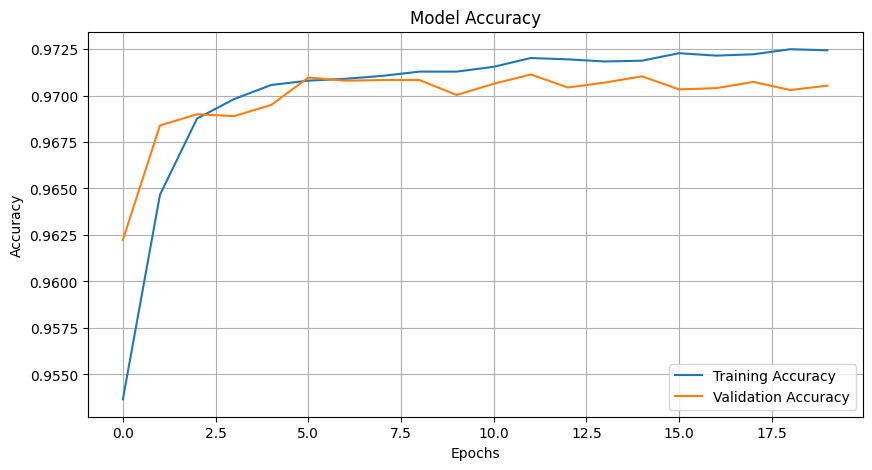

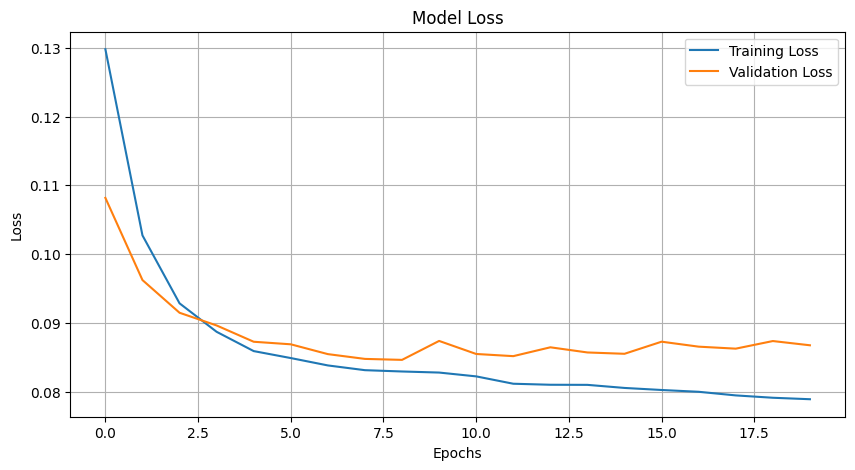

In [12]:


# Extract accuracy and loss from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot model accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()